<a href="https://colab.research.google.com/github/kasaiannn/HW/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://drive.google.com/file/d/1b7tSyJBpWggHEBGdWa80JdKh7VNq2FEf/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1
Implement serial test and apply to a `samples`

In [8]:
import numpy as np
from scipy.stats import chisquare

# Генерация данных
np.random.seed(42)
samples = np.random.uniform(0, 1, 1000)  # 1000 случайных чисел в [0, 1)

# Параметры теста
K = 10  # Количество интервалов на каждую ось
n = len(samples) // 2  # Количество пар

# Разбиение на пары
pairs = samples.reshape(-1, 2)

# Подсчет наблюдаемых частот в K x K бинах
observed, _, _ = np.histogram2d(pairs[:, 0], pairs[:, 1], bins=np.linspace(0, 1, K+1))
observed = observed.flatten()

# Вычисление ожидаемых частот
expected = np.full(K * K, n / (K * K))

# Применение критерия хи-квадрат
chi2_stat, p_value = chisquare(observed, expected)

# Вывод результатов
print(f"Статистика хи-квадрат: {chi2_stat}")
print(f"P-value: {p_value}")

# Вывод наблюдаемых и ожидаемых частот
print("Наблюдаемые частоты (observed):", observed)
print("Ожидаемые частоты (expected):", expected)

Статистика хи-квадрат: 98.4
P-value: 0.49812574145151856
Наблюдаемые частоты (observed): [ 4.  8.  7.  5.  3.  9.  5.  4.  8. 11.  7.  6.  5.  5.  8.  7.  7.  7.
  7.  8.  5.  6.  1. 11.  2.  6.  5.  3.  5.  2.  6.  6.  3.  5.  3.  5.
  5.  4.  7.  6.  3.  4.  5.  6.  3.  4.  2.  4.  2.  5.  8.  1.  6.  3.
  6.  4.  8.  5.  4.  4.  6.  8.  7.  4.  6.  8.  2.  4.  4.  3.  2.  6.
  6.  0.  5.  7.  6.  4.  6.  2.  2.  1.  4.  6.  6.  4.  3.  6.  3.  7.
  1.  4.  4.  7.  2.  7.  4.  4. 11.  4.]
Ожидаемые частоты (expected): [5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5.]


### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [10]:
import numpy as np
from scipy.stats import kstest

# Определение генераторов
def rng_bad(size):
    # Плохой генератор: неравномерное распределение (например, смещенное к 0.5)
    return np.random.normal(0.5, 0.1, size).clip(0, 1)  # Обрезаем значения до [0, 1]

def rng_good(size):
    # Хороший генератор: равномерное распределение
    return np.random.uniform(0, 1, size)

# Генерация данных
size = 1000
bad_samples = rng_bad(size)
good_samples = rng_good(size)

# Функция для применения критерия Колмогорова-Смирнова
def kolmogorov_smirnov_test(samples):
    # Проверяем, соответствует ли выборка равномерному распределению на [0, 1)
    ks_stat, p_value = kstest(samples, 'uniform', args=(0, 1))
    return ks_stat, p_value

# Тестируем rng_bad
ks_stat_bad, p_bad = kolmogorov_smirnov_test(bad_samples)
print(f"rng_bad: Статистика Колмогорова-Смирнова = {ks_stat_bad}, p-value = {p_bad}")

# Тестируем rng_good
ks_stat_good, p_good = kolmogorov_smirnov_test(good_samples)
print(f"rng_good: Статистика Колмогорова-Смирнова = {ks_stat_good}, p-value = {p_good}")

rng_bad: Статистика Колмогорова-Смирнова = 0.2834432980821358, p-value = 1.406630013065809e-71
rng_good: Статистика Колмогорова-Смирнова = 0.02112525769473228, p-value = 0.7552258807232278


* More randomness tests - [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests).
* More methods for generating a uniform value [here](https://en.wikipedia.org/wiki/List_of_random_number_generators).
* A story about dynamical systems and the transition to chaos https://www.youtube.com/watch?v=ovJcsL7vyrk&feature=youtu.be

# Generating a sample from a given distribution

Suppose we have a random number generator from the segment [0, 1] (use the `np.random.rand()` function for this). How to get a sample from another distribution $F$?

### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

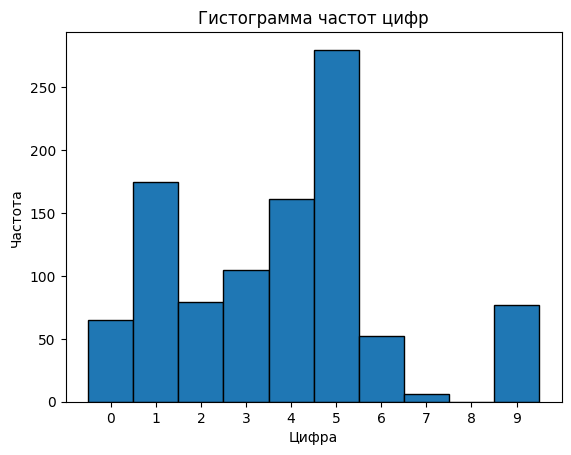

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Заданные веса
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
digits = np.arange(10)  # Цифры от 0 до 9

# Нормализация весов
weights /= weights.sum()

# Упорядочивание весов по убыванию
sorted_indices = np.argsort(-weights)
sorted_weights = weights[sorted_indices]
sorted_digits = digits[sorted_indices]

# Генерация выборки
sample_size = 1000
sample = []

for _ in range(sample_size):
    u = np.random.rand()  # Случайное число от 0 до 1
    cumulative_weight = 0.0
    for i in range(len(sorted_weights)):
        cumulative_weight += sorted_weights[i]
        if u < cumulative_weight:
            sample.append(sorted_digits[i])  # Выбор цифры
            break

# Преобразуем выборку в массив numpy
sample = np.array(sample)

# Построение гистограммы
plt.hist(sample, bins=np.arange(11) - 0.5, edgecolor='black')
plt.xticks(np.arange(10))
plt.xlabel('Цифра')
plt.ylabel('Частота')
plt.title('Гистограмма частот цифр')
plt.show()

## Inverse transform method

The following proposition is the idea behind the *inverse transform* method:

If $\xi$ has a uniform distribution in $[0,1]$, then $F^{-1}(\xi)$ is distributed according to the law of $F$. (For which $F$ is this true?)

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

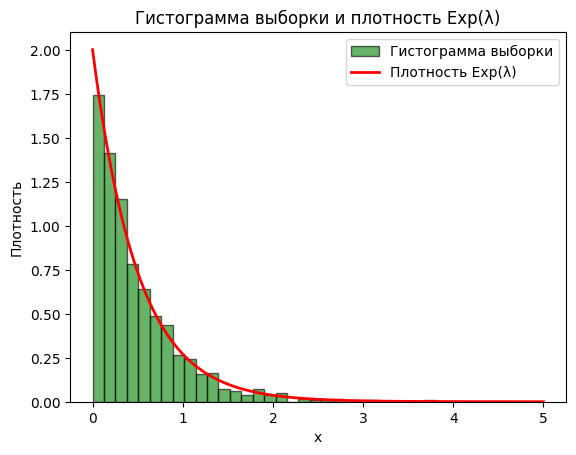

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Параметр экспоненциального распределения
lambda_ = 2.0  # Например, λ = 2

# Генерация выборки с использованием обратного метода преобразования
sample_size = 1000
u = np.random.rand(sample_size)  # Равномерно распределенные числа
sample = -np.log(1 - u) / lambda_  # Применяем обратную функцию

# Построение гистограммы
plt.hist(sample, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Гистограмма выборки')

# Точный график плотности распределения
x = np.linspace(0, 5, 1000)  # Диапазон для построения графика
pdf = expon.pdf(x, scale=1/lambda_)  # Плотность распределения Exp(λ)
plt.plot(x, pdf, 'r-', lw=2, label='Плотность Exp(λ)')

# Настройка графика
plt.xlabel('x')
plt.ylabel('Плотность')
plt.title('Гистограмма выборки и плотность Exp(λ)')
plt.legend()
plt.show()

## Rejection sampling (Accept-reject method)

The idea of the method is to sample from the distribution we know how to sample from, and then select points that follow the desired distribution. More precisely: let's say we know how to sample from a distribution with density $p$, and we want to sample from a distribution with density $\pi$. Let's take a random $x$ from the distribution $p$. Then take $y$ uniformly distributed on the interval $[0, p(x)]$. If the point $(x, y)$ falls under the graph of $\pi$, we take $x$ as a sampling element from $\pi$. If not, we repeat the procedure for a new $x$. The picture illustrates the idea of the method (the densities are normalised so that one lies entirely under the other):

<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 50%;"/>

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

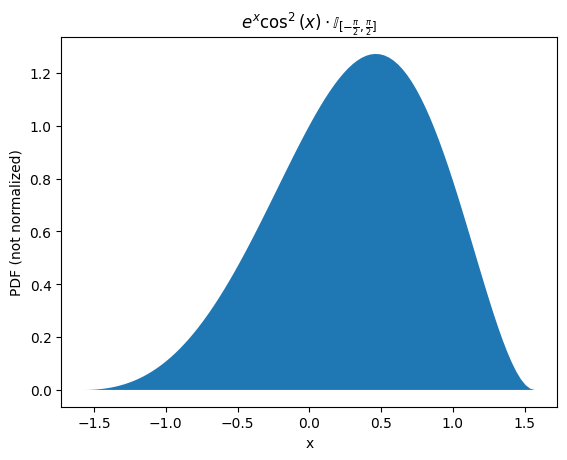

In [ ]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

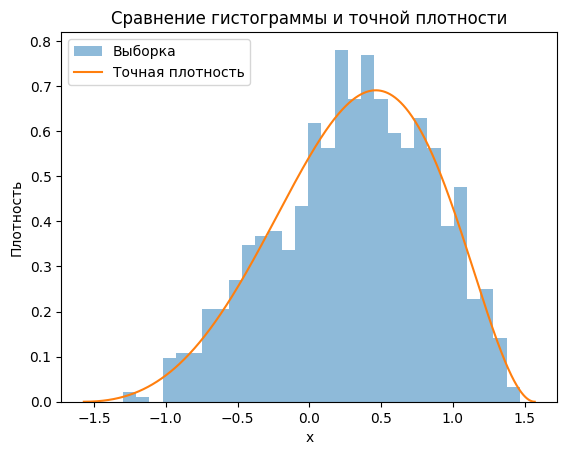

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем целевую плотность
def target_density(x):
    return np.exp(x) * (np.cos(x))**2 * (np.abs(x) <= np.pi/2)

# Вспомогательная плотность (равномерное распределение)
def proposal_density(x):
    return 1 / np.pi * (np.abs(x) <= np.pi/2)

# Генерация выборки методом отклонения
def rejection_sampling(target_density, proposal_density, M, n_samples):
    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(-np.pi/2, np.pi/2)  # Сэмплируем из p(x)
        y = np.random.uniform(0, M * proposal_density(x))  # Сэмплируем y
        if y <= target_density(x):  # Проверяем условие
            samples.append(x)
    return np.array(samples)

# Находим M
x_values = np.linspace(-np.pi/2, np.pi/2, 1000)
M = np.max(target_density(x_values) / proposal_density(x_values))

# Генерация 1000 точек
samples = rejection_sampling(target_density, proposal_density, M, 1000)

# Построение гистограммы и графика плотности
plt.hist(samples, bins=30, density=True, alpha=0.5, label="Выборка")
x_plot = np.linspace(-np.pi/2, np.pi/2, 1000)
plt.plot(x_plot, target_density(x_plot) / np.trapz(target_density(x_plot), x_plot), label="Точная плотность")
plt.xlabel("x")
plt.ylabel("Плотность")
plt.legend()
plt.title("Сравнение гистограммы и точной плотности")
plt.show()

## Coordinate transformation method

The accept-reject method may in some cases be inefficient and require too many sample points. An alternative is to try to find a coordinate transformation that converts a simple area (from which it is easy to sample, for example, a unit square) into the required area, but preserves the area ratio (why?).

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

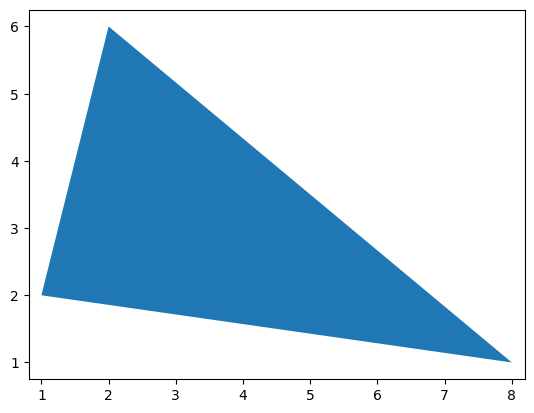

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

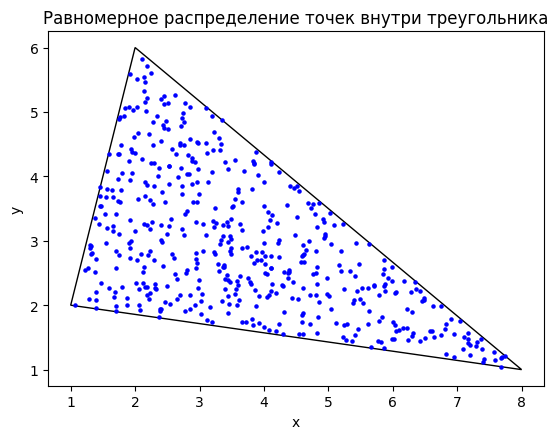

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Вершины треугольника
vertices = np.array([[1, 2], [2, 6], [8, 1]])

# Генерация равномерно распределенных точек внутри треугольника
def uniform_triangle_sampling(vertices, n_points):
    # Координаты вершин
    A, B, C = vertices
    x1, y1 = A
    x2, y2 = B
    x3, y3 = C

    # Генерация барицентрических координат
    u = np.random.uniform(0, 1, n_points)
    v = np.random.uniform(0, 1, n_points)

    # Корректировка для равномерного распределения
    mask = u + v > 1
    u[mask] = 1 - u[mask]
    v[mask] = 1 - v[mask]

    # Преобразование в декартовы координаты
    x = x1 + u * (x2 - x1) + v * (x3 - x1)
    y = y1 + u * (y2 - y1) + v * (y3 - y1)

    return np.column_stack((x, y))

# Генерация 500 точек
points = uniform_triangle_sampling(vertices, 500)

# Визуализация
fig, ax = plt.subplots()
polygon = Polygon(vertices, closed=True, edgecolor='black', facecolor='none')
ax.add_patch(polygon)
ax.scatter(points[:, 0], points[:, 1], s=5, color='blue')
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Равномерное распределение точек внутри треугольника')
plt.show()

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

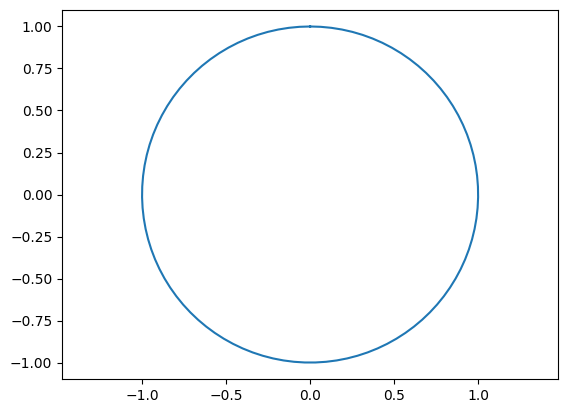

In [ ]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

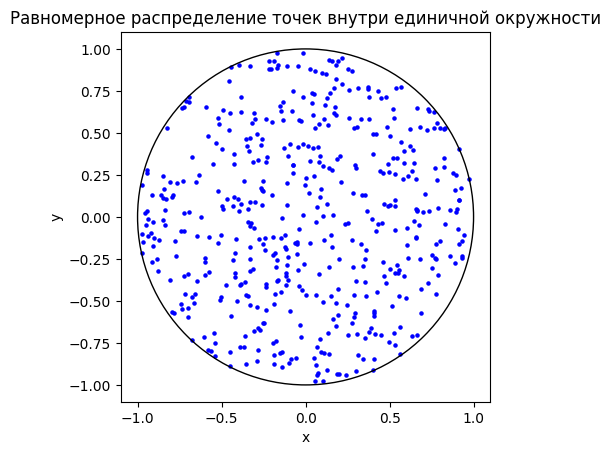

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация равномерно распределенных точек внутри единичной окружности
def uniform_circle_sampling(n_points):
    # Генерация радиуса и угла
    r = np.sqrt(np.random.uniform(0, 1, n_points))  # Квадратный корень для равномерного распределения
    theta = np.random.uniform(0, 2 * np.pi, n_points)

    # Преобразование в декартовы координаты
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    return x, y

# Генерация 500 точек
x, y = uniform_circle_sampling(500)

# Визуализация
fig, ax = plt.subplots()
ax.scatter(x, y, s=5, color='blue')  # Точки
circle = plt.Circle((0, 0), 1, edgecolor='black', facecolor='none')  # Единичная окружность
ax.add_patch(circle)
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Равномерное распределение точек внутри единичной окружности')
plt.show()

# Random normal generator

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

In [ ]:
import seaborn as sns

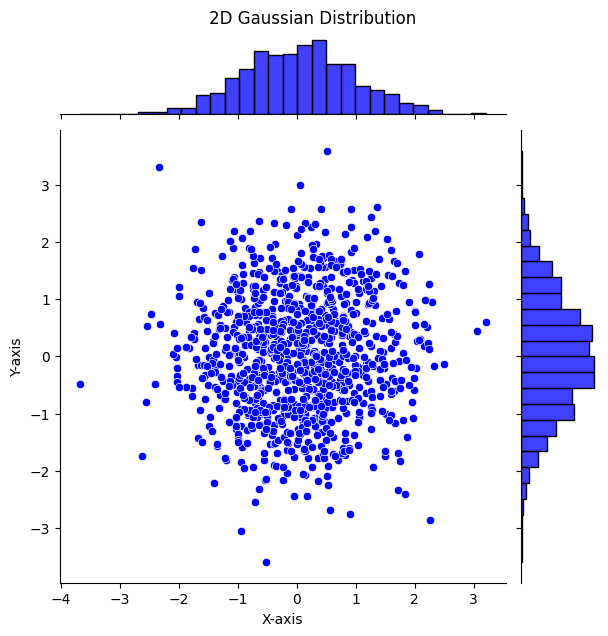

In [ ]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

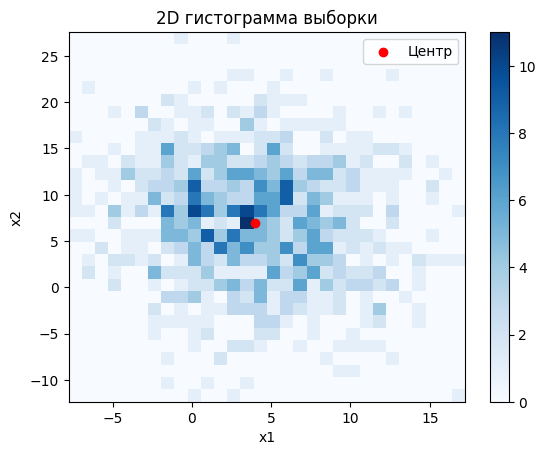

Выборочное среднее:
 [3.95635171 7.1385115 ]
Точное среднее:
 [4 7]
Выборочная ковариационная матрица:
 [[21.19659361 -3.4523781 ]
 [-3.4523781  38.96506431]]
Точная ковариационная матрица:
 [[20 -4]
 [-4 40]]


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Модифицированный алгоритм Бокса-Мюллера
def box_muller_modified(n_samples):
    samples = []
    while len(samples) < n_samples:
        U1, U2 = np.random.uniform(-1, 1, 2)  # Генерация двух равномерных случайных величин
        S = U1**2 + U2**2
        if S < 1 and S > 0:  # Проверка, чтобы S была в (0, 1)
            Z1 = U1 * np.sqrt(-2 * np.log(S) / S)
            Z2 = U2 * np.sqrt(-2 * np.log(S) / S)
            samples.append((Z1, Z2))
    return np.array(samples)


mu = np.array([4, 7])  # Вектор средних
Sigma = np.array([[20, -4], [-4, 40]])  # Ковариационная матрица

# Разложение Холецкого для матрицы Sigma
L = np.linalg.cholesky(Sigma)

# Генерация выборки из 2D нормального распределения
n_samples = 1000
Z = box_muller_modified(n_samples)  # Генерация стандартных нормальных величин
X = mu + Z @ L.T  # Преобразование в многомерное нормальное распределение

# Визуализация 2D гистограммы
plt.hist2d(X[:, 0], X[:, 1], bins=30, cmap='Blues')
plt.colorbar()
plt.scatter(mu[0], mu[1], color='red', label='Центр')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D гистограмма выборки')
plt.legend()
plt.show()

# Сравнение выборочного среднего и ковариационной матрицы
sample_mean = np.mean(X, axis=0)  # Выборочное среднее
sample_cov = np.cov(X, rowvar=False)  # Выборочная ковариационная матрица

print("Выборочное среднее:\n", sample_mean)
print("Точное среднее:\n", mu)
print("Выборочная ковариационная матрица:\n", sample_cov)
print("Точная ковариационная матрица:\n", Sigma)